# In this notebook we will do exploratory data analysis of the dataset

In [1]:
# Importing required Libraries
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
from sklearn import metrics
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
pd.set_option('display.max_columns', None)

Read the data

In [4]:
df = pd.read_csv('data_Reassessment.csv',encoding = "ISO-8859-1")

Check the data length

In [5]:
df.shape

(4424, 37)

Description of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ï»¿Marital status                               4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
There are no null values in the dataset.

In [7]:
df.describe()

,ï»¿Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


There are 4424 students data.

Average age is 19 years, with a standard deviation of 7.5.

A peek at the data

In [8]:
df.head()

,ï»¿Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
df.columns.dtype

dtype('O')

In [10]:
# target variable
target = 'Target'

# categorical variables
cat_vars = [var for var in df.columns if var != 'Target' and df[var].dtype=='O']

# numerical variables
num_vars = [var for var in df.columns if var != 'Target' and var not in cat_vars]

print('There are {} categorical variables'.format(len(cat_vars)))
print('There are {} numerical variables'.format(len(num_vars)))

There are 0 categorical variables
There are 36 numerical variables


A look at the distribution of response variable y,which is if a student will dropout,graduate or enrolled

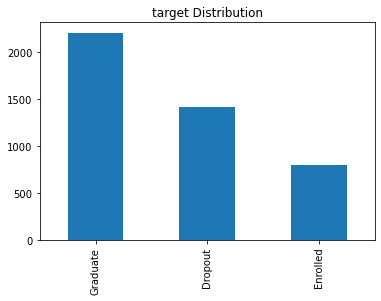

In [12]:
df['Target'].value_counts().plot(kind = 'bar',title='target Distribution',x='target')
plt.show(block=True)

In [13]:
(df[target].value_counts())/len(df)

Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: Target, dtype: float64

From the Target distributions we can see that 49% are the graduate,32% are drop out and 17% are enrolled

# Data Exploration

1. Numerical Features

In [14]:
df.head()

,ï»¿Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [15]:
df[num_vars]

,ï»¿Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


Uni-variate Analysis : Graphical represention of the numerical variables to check the distribution and outliers
We will create a function which will use histogram,box plot for the analysis

In [16]:
def plot_num_features(df, variable):
    """ Function to visualize histogram, box plot for continous variables"""
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1,3,1)
    df[variable].hist(bins=30)
    plt.title('Histogram')
    plt.xlabel(variable)
    
    plt.subplot(1,3,2)
    sns.distplot(df[variable])
    plt.title('Dist plot')
    plt.xlabel(variable)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.xlabel(variable)
    
    plt.show()

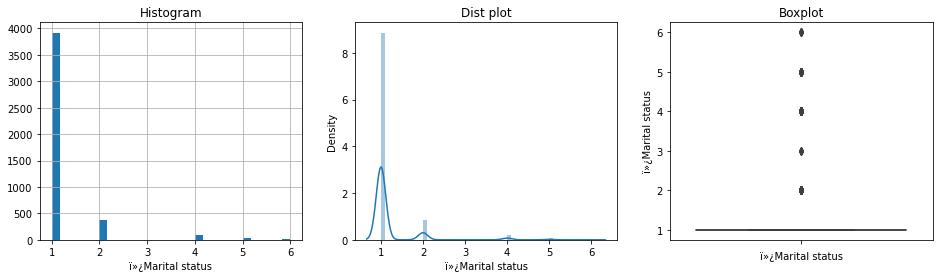

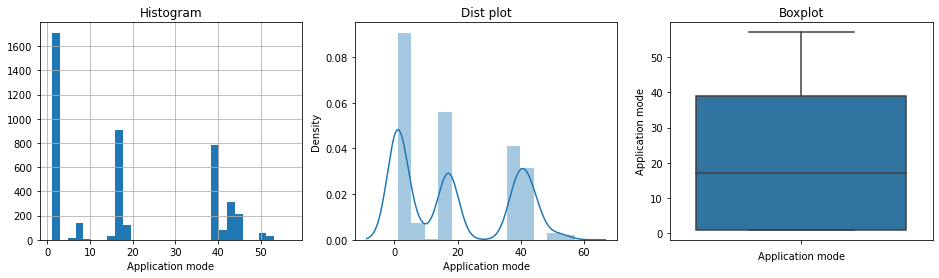

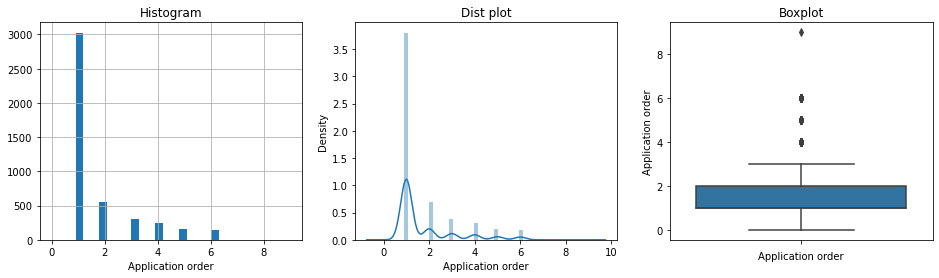

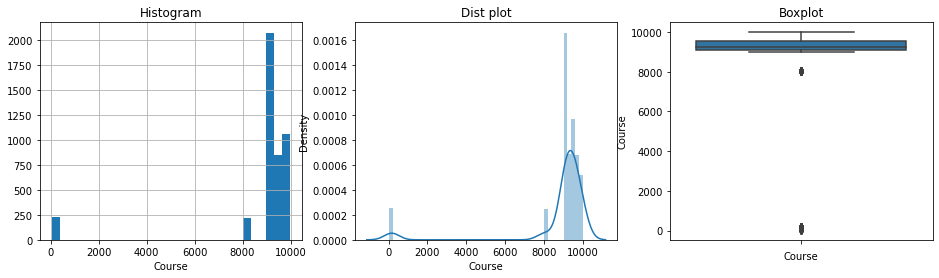

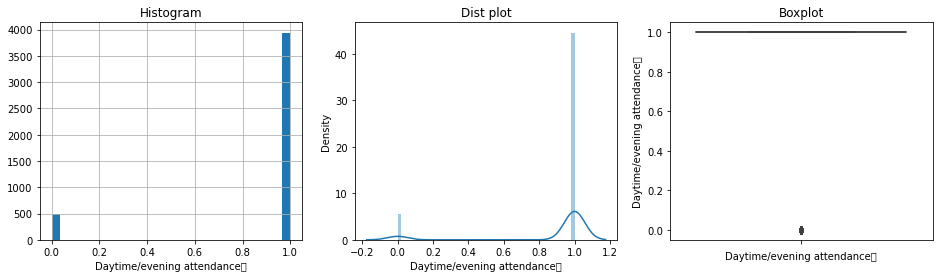

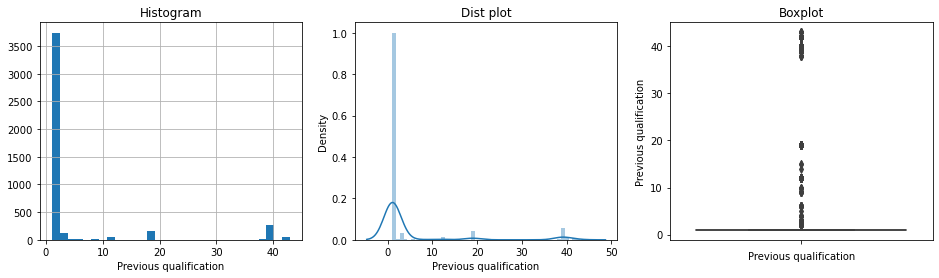

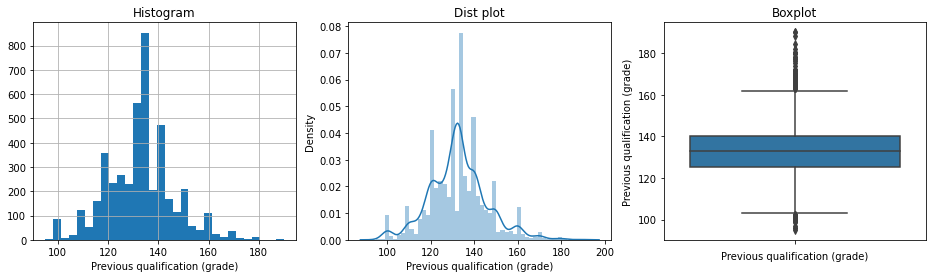

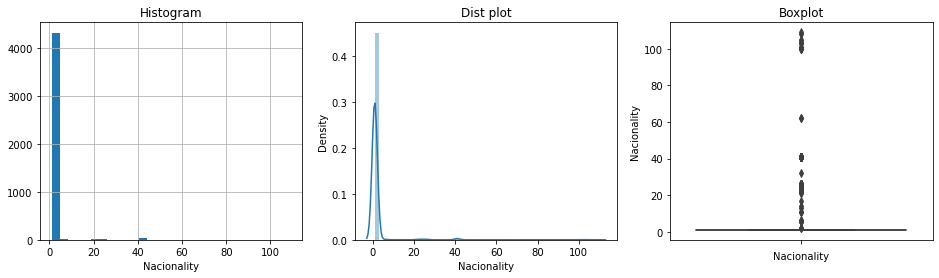

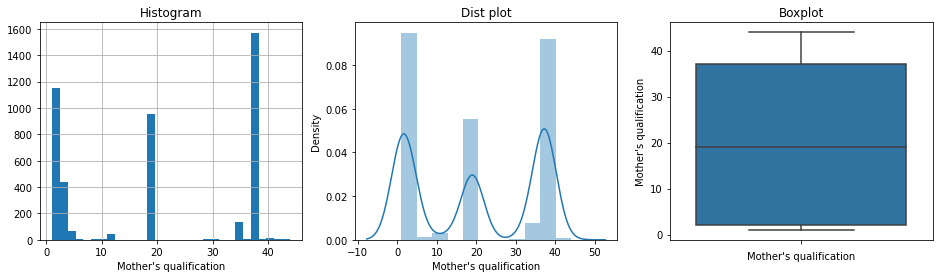

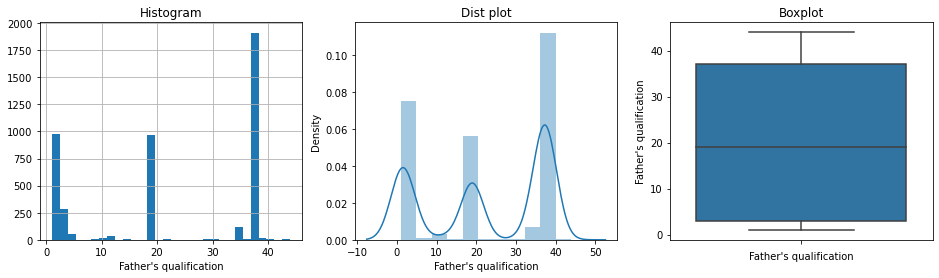

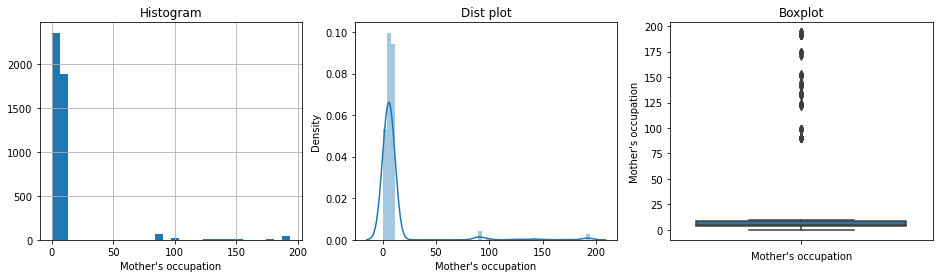

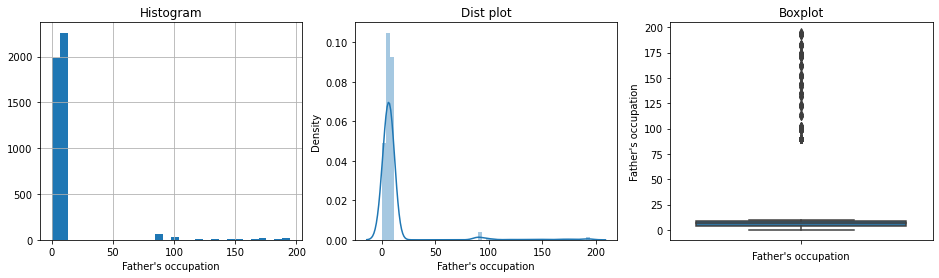

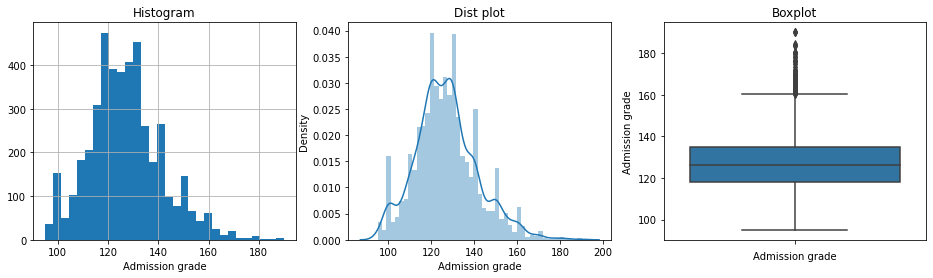

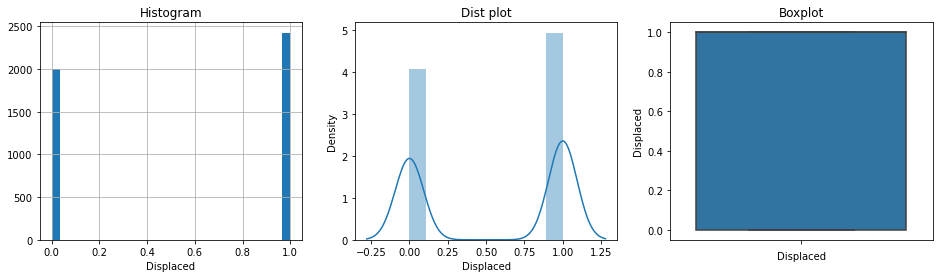

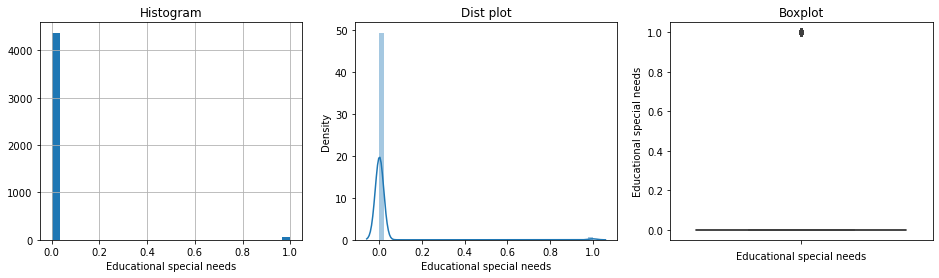

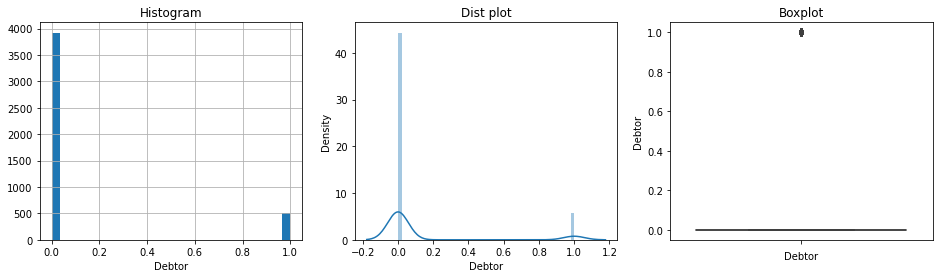

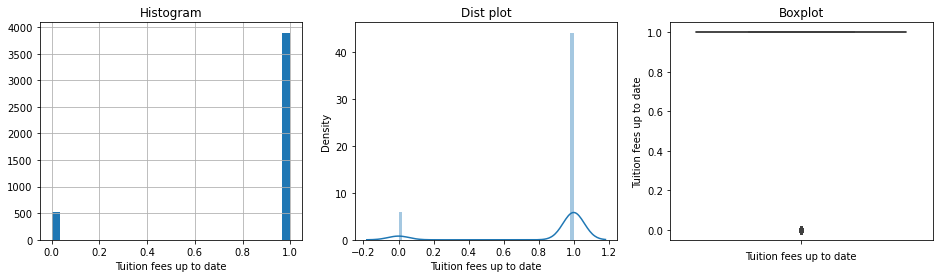

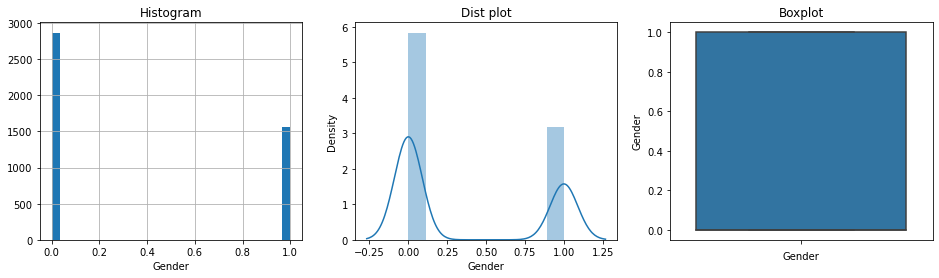

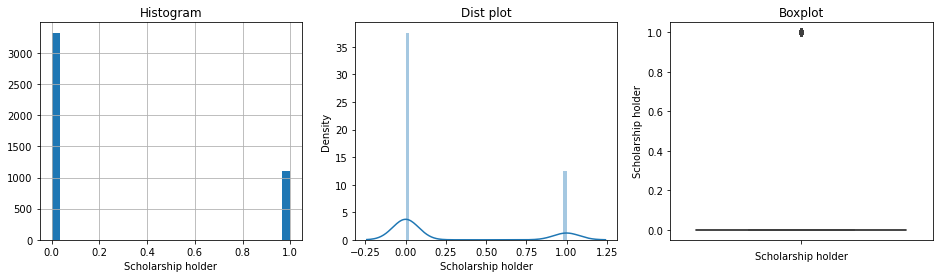

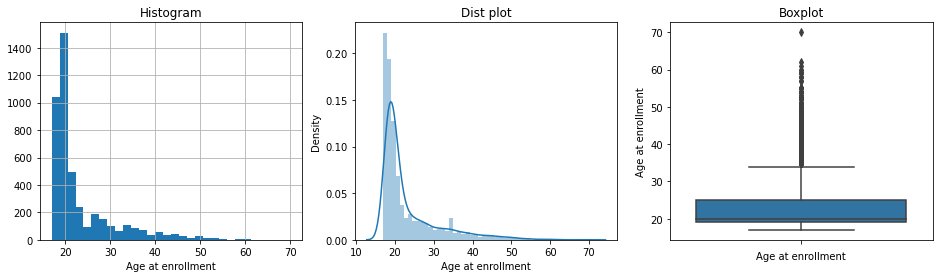

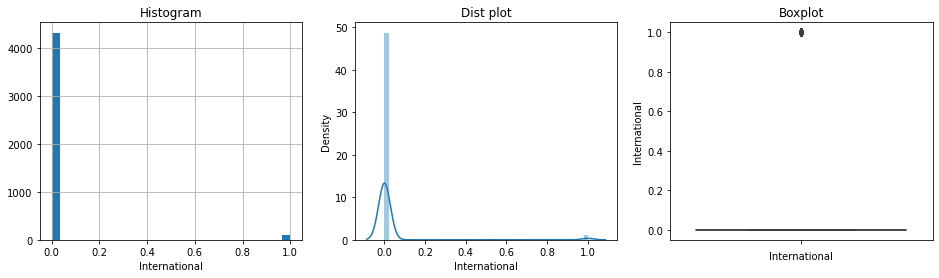

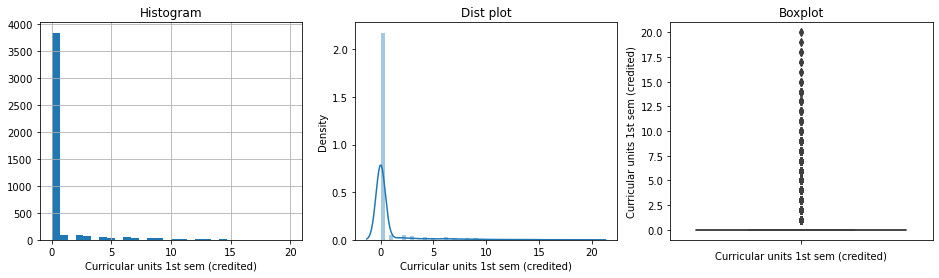

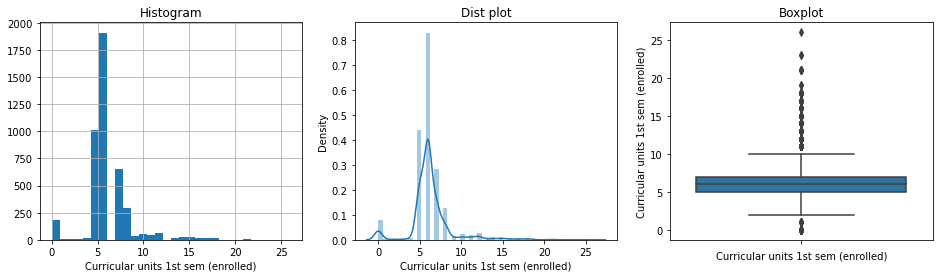

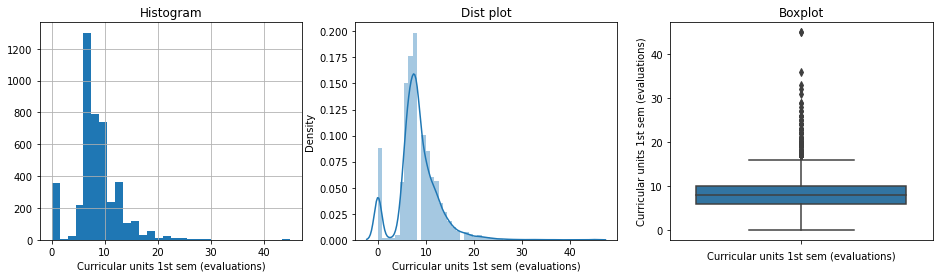

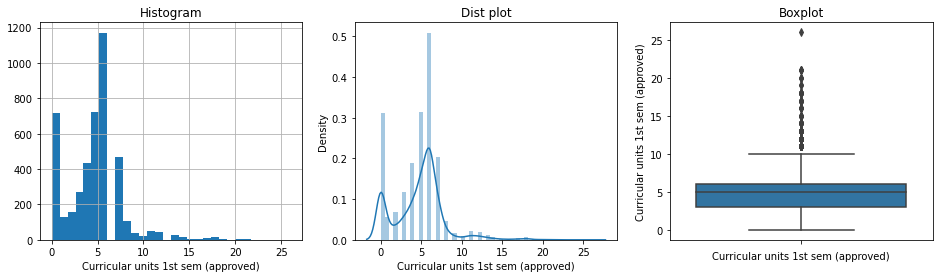

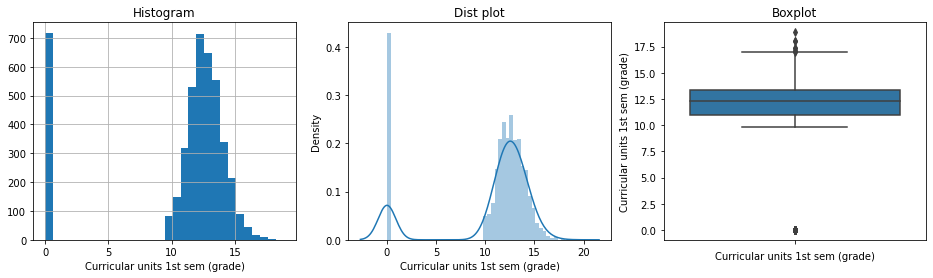

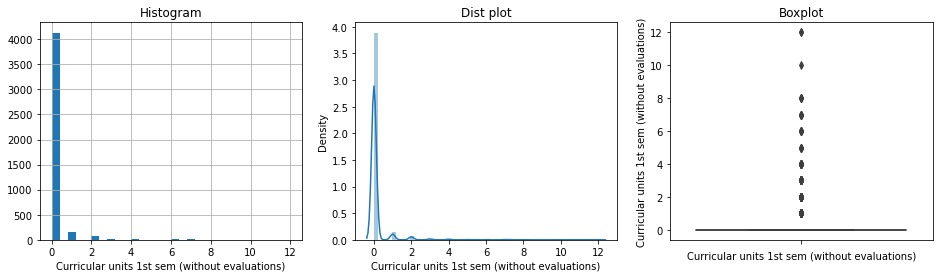

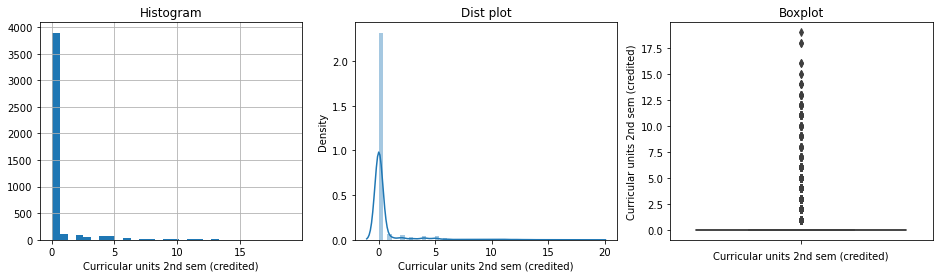

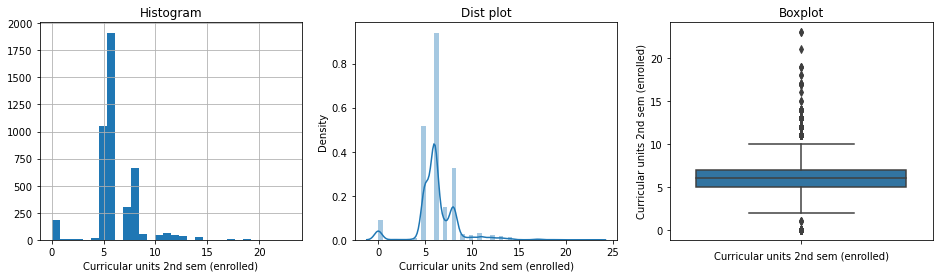

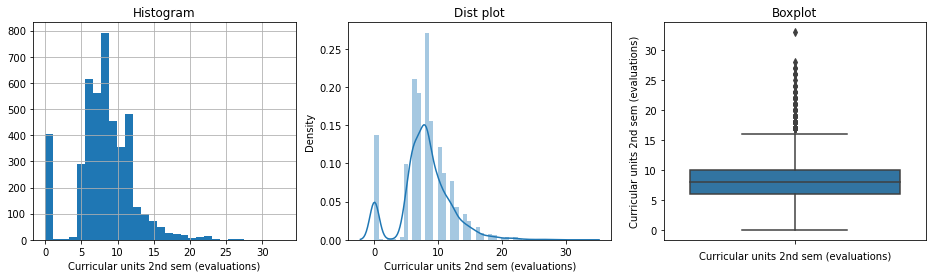

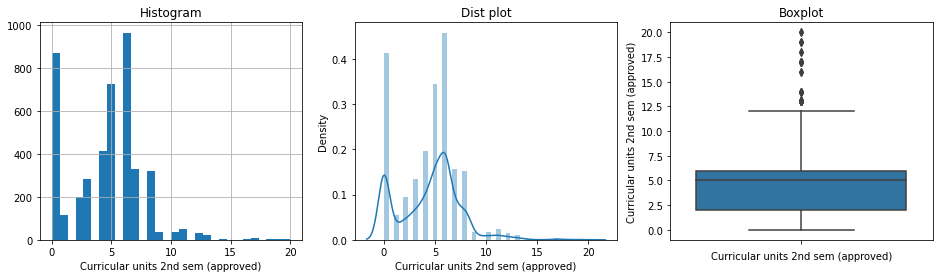

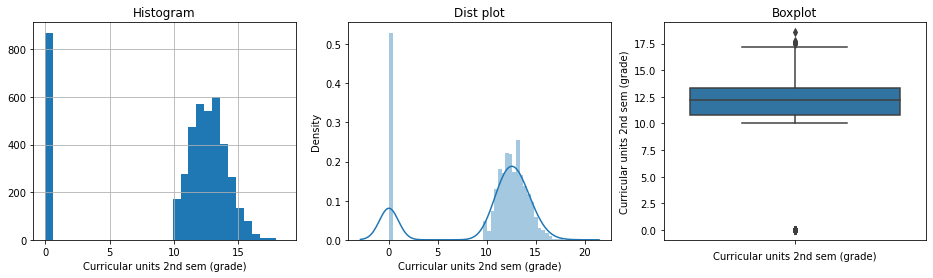

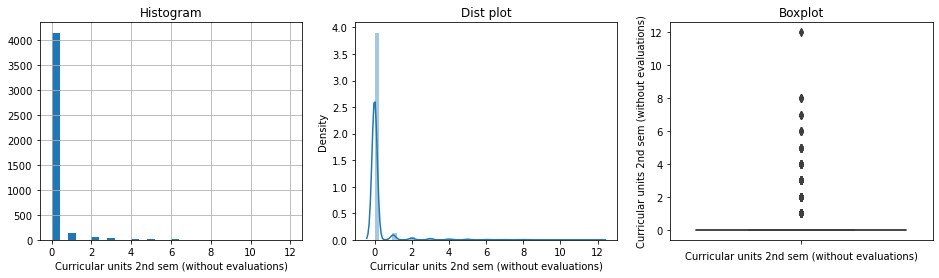

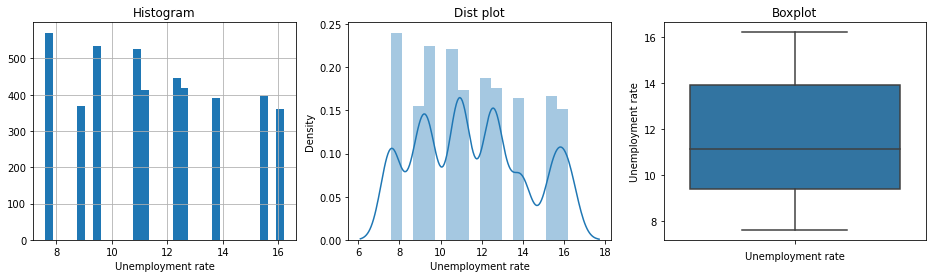

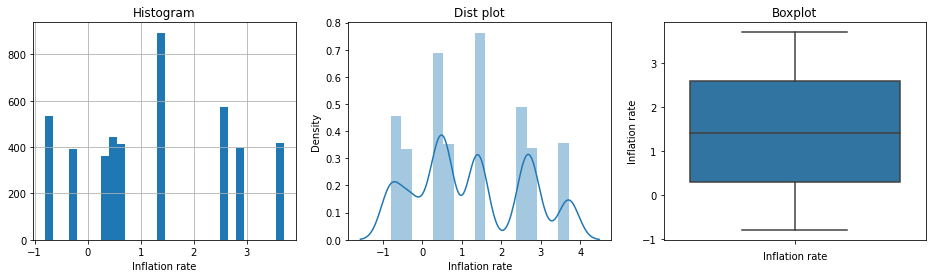

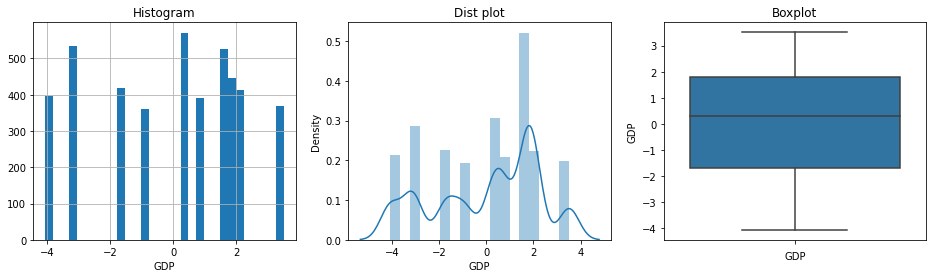

In [17]:
s = [plot_num_features(df,i) for i in df[num_vars]]

Check Normal Distrubution

We will do normality test to check if there is a gaussian diatribution

Hypothesis

H0 = Null Hypothesis : The data is normally distributed
H1 : Alternative Hypothesis : The data is not gaussian

p = 0.05 (probability value threshold)

In [18]:
# normality test
def normality_test(data,variable):
    stat, p = shapiro(data[variable])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [19]:
v = [normality_test(df,i) for i in df[num_vars]]

Statistics=0.326, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.810, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.619, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.392, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.360, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.386, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.106, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.794, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.785, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.278, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.279, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.633, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.080, p=0.000
Sample does not look G

From the above tests it is clear that the numerical data don't have gaussian/normal distribution

# Dealing with Outliers

Below are the varibales having outlier

1. Age
In this section we will handle the outlier values.

1. Age
We will convert age to a categorical varibale where 17-70 (as minimum age is 17), 31-40, 41-50, 51-60, and more than 61

In [20]:
# let's divide age into the buckets 
n_bins = [17, 30, 40, 50, 60, 100]

# bins labels
labels = ['17-30', '31-40', '41-50', '51-60', '>60']


# discretization
df['age_group'] = pd.cut(df['Age at enrollment'], bins=n_bins, labels=labels, include_lowest=True)

In [ ]:
#df.drop(['age_group'], axis=1, inplace=True)
#df.loc[(df['age'] ==17)]

In [21]:
df.head()

,ï»¿Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_group
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,17-30
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,17-30
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,17-30
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,17-30
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,41-50


In [22]:
df.age_group.value_counts()

17-30    3762
31-40     437
41-50     182
51-60      40
>60         3
Name: age_group, dtype: int64

Age group distribution

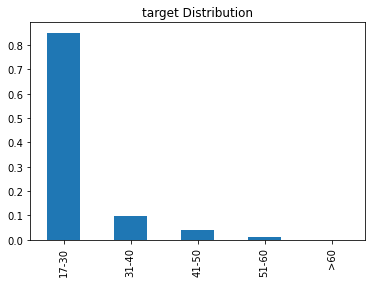

In [23]:
(df['age_group'].value_counts()/len(df)).plot(kind = 'bar',title='target Distribution',x='target')
plt.show(block=True)

In [24]:
# dropping age column
df.drop(['Age at enrollment'], axis=1, inplace=True)

In [25]:
df.head()

,ï»¿Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,age_group
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,17-30
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,17-30
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,17-30
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,17-30
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,41-50


In [26]:
df.shape

(4424, 37)

In [27]:
# remove age and pdays from num_vars
num_vars.remove('Age at enrollment')

In [28]:
# add age_group to cat_vars
cat_vars.append('age_group')

# 2. Categorical Features
We have 1 categorical variables which is a response variable

In [29]:
# cardinality
for var in cat_vars:
    print(var, 'has {} labels'.format(df[var].nunique()))
    print((df[var].value_counts() / len(df)).sort_values(ascending=False))
    print()

age_group has 5 labels
17-30    0.850362
31-40    0.098779
41-50    0.041139
51-60    0.009042
>60      0.000678
Name: age_group, dtype: float64



# 3. Data Visualisation

Bi-variate analysis : We will discover the distribution of response variable based on numerical and categorical features,
and accordingly we will infer what variables more important for the prediction

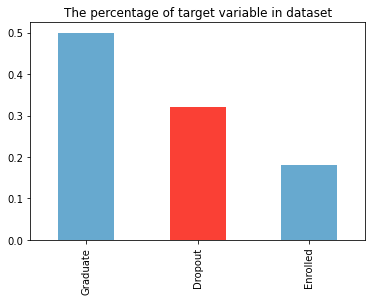

In [30]:
# target variable distribution

((df[target].value_counts()) / len(df)).plot.bar(color=['#67a9cf','#FA4035'])
plt.title('The percentage of target variable in dataset');

In [31]:
df[target].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

We will be creating three groups of the target variables and then will see the distribution of these groups on numerical and categorical features

In [32]:
# create two groups of yes and no
group_Dropout = df[df[target]=='Dropout']
group_Graduate = df[df[target]=='Graduate']
group_Enrolled = df[df[target]=='Enrolled']

print("group_Dropout' data shape: {}".format(group_Dropout.shape))
print("group_Graduate data shape: {}".format(group_Graduate.shape))
print("group_Enrolled data shape: {}".format(group_Enrolled.shape))

group_Dropout' data shape: (1421, 37)
group_Graduate data shape: (2209, 37)
group_Enrolled data shape: (794, 37)


In [33]:
num_vars

['ï»¿Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

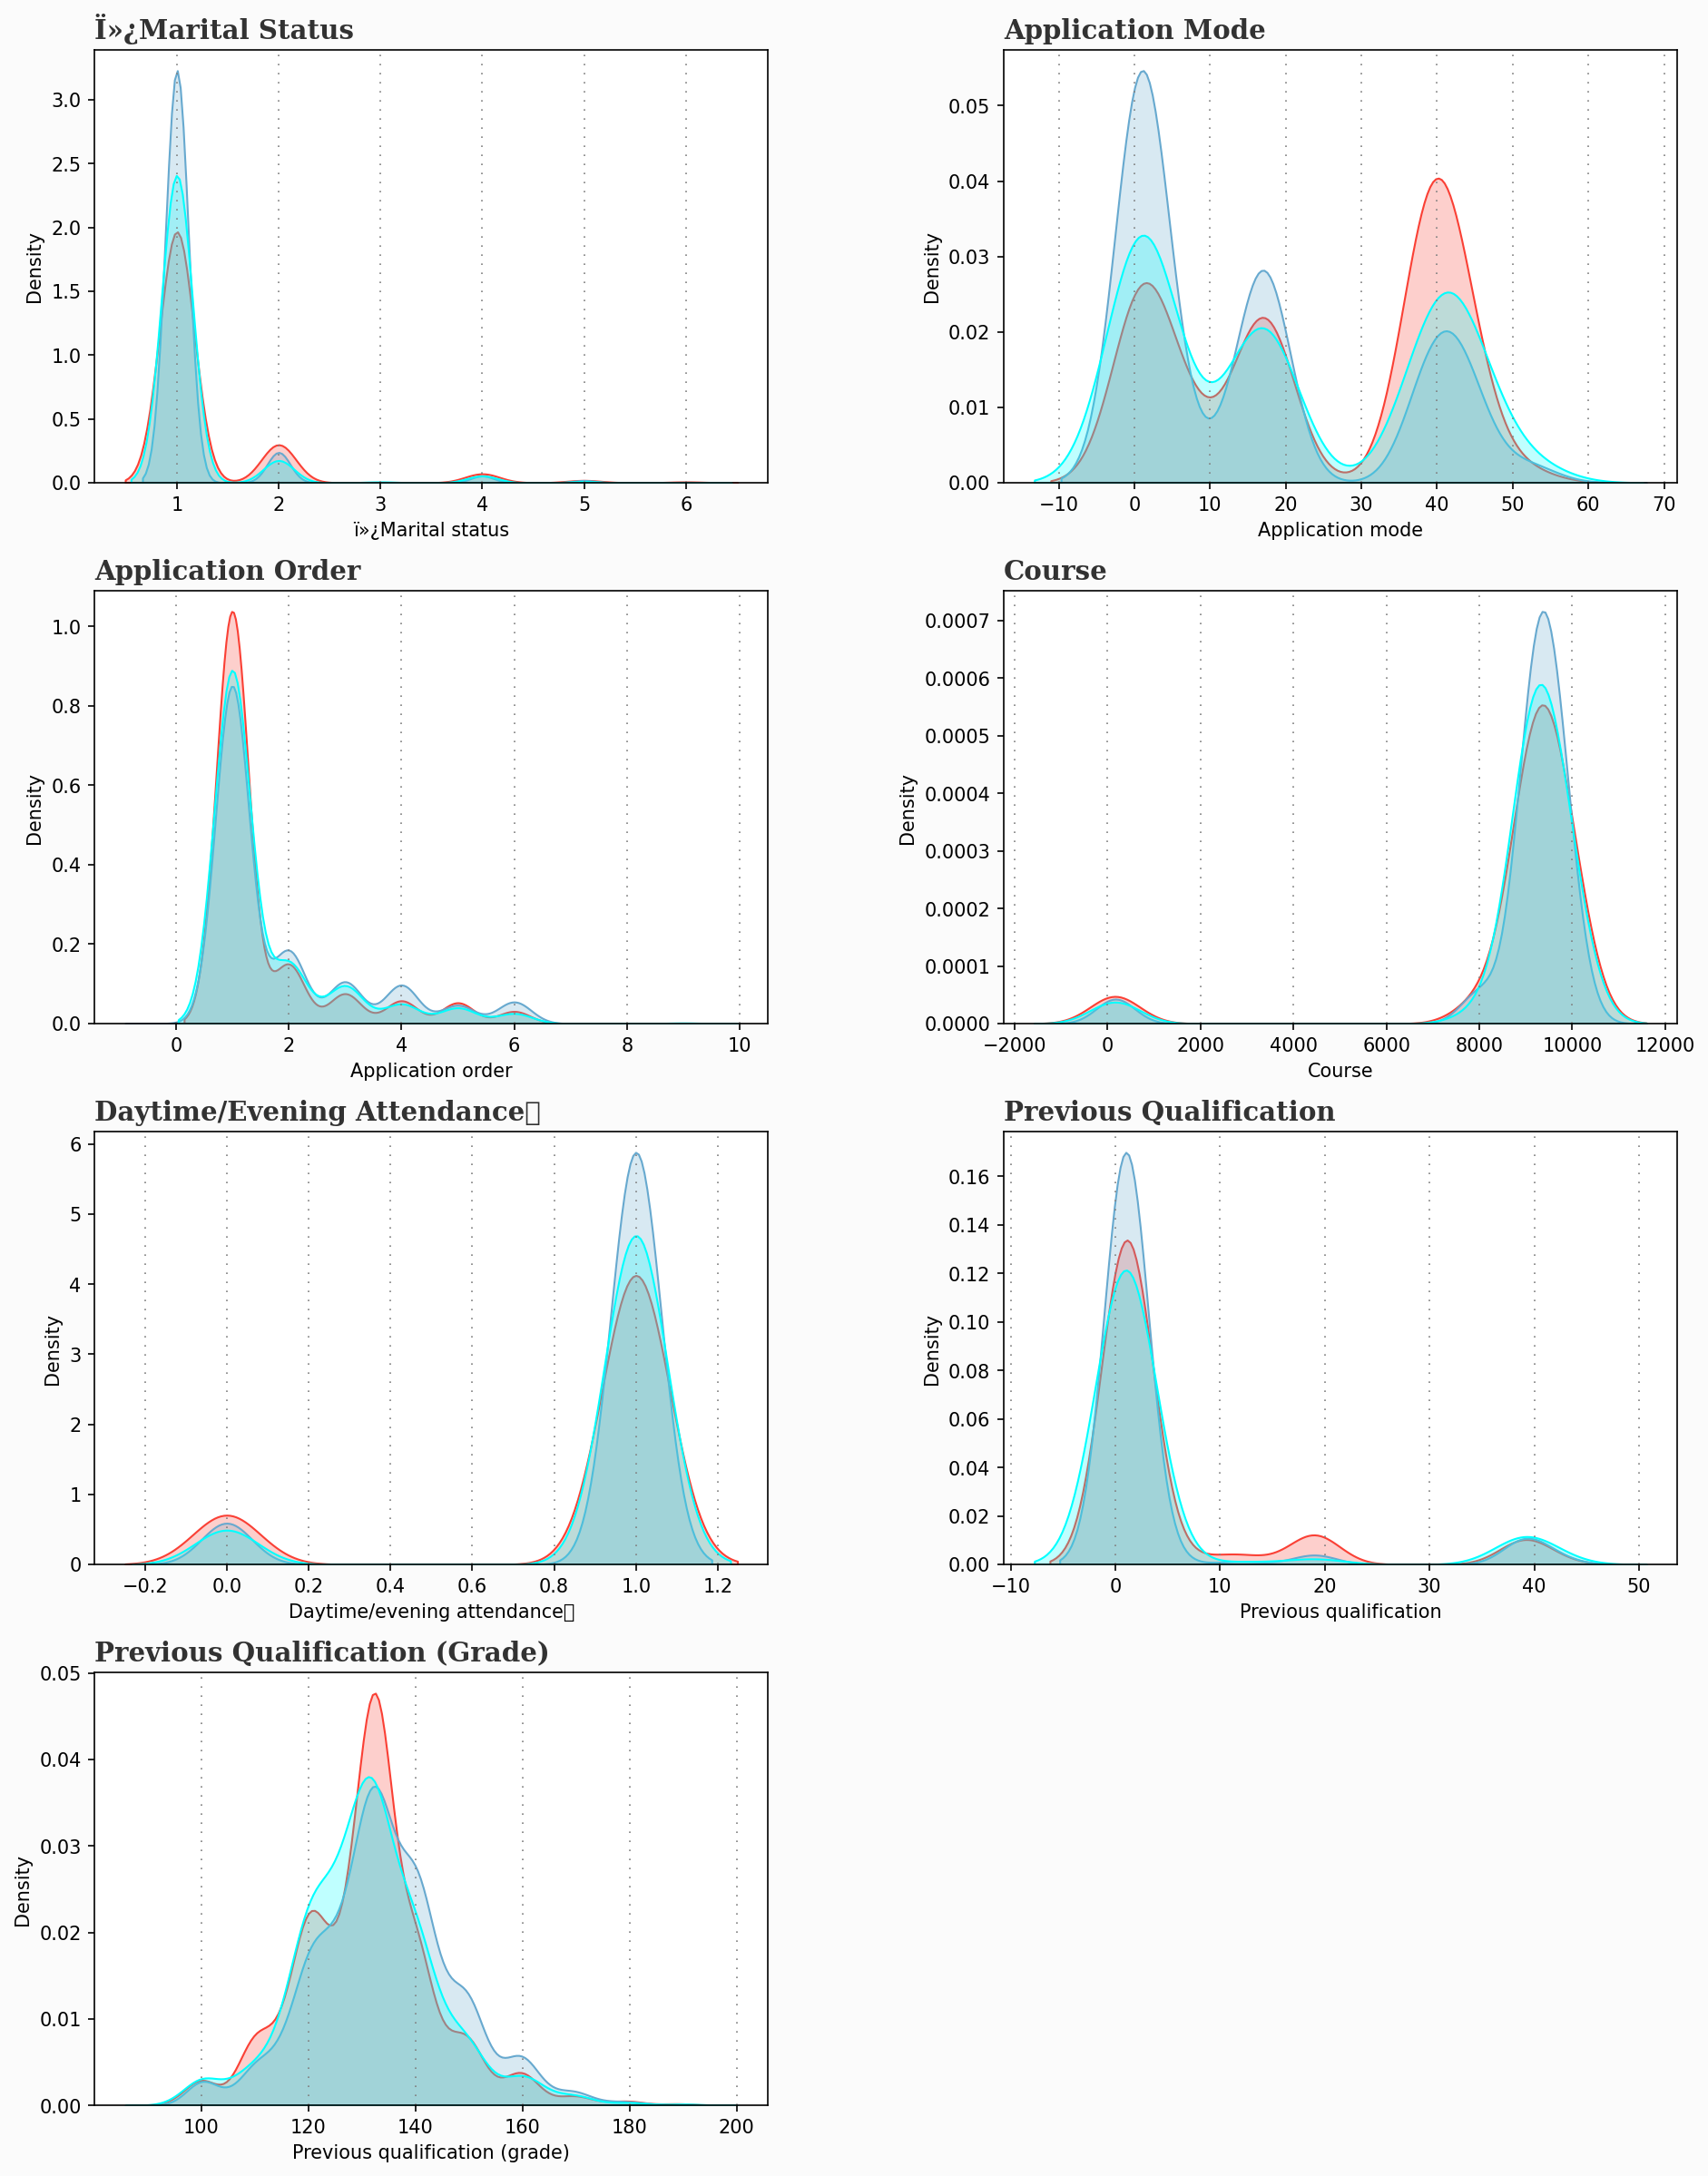

In [36]:
background_color = '#fbfbfb'

fig = plt.figure(figsize=(15,20), dpi=150)
fig.patch.set_facecolor(background_color) # set up background color
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.35, hspace=0.25)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1]),
       fig.add_subplot(gs[2,0]),
       fig.add_subplot(gs[2,1]),
       fig.add_subplot(gs[3,0])]


def hist_num_response_relation(df, variable,ax):
    """ Function to visualize distribution of response variable across multiple numerical variables"""
    # create histograms
    sns.kdeplot(group_Dropout[variable], ax=ax,color='#FA4035', shade=True, label='Dropout')
    sns.kdeplot(group_Graduate[variable], ax=ax,color='#67a9cf', shade=True, label='Graduate')
    sns.kdeplot(group_Enrolled[variable], ax=ax,color='#00FFFF', shade=True, label='Enrolled')
    ax.grid(which='major', color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
    ax.set_title(f'{variable}'.title(), fontsize=14, fontweight='bold', 
                fontfamily='serif', color='#323232', loc='left')
    
c= [hist_num_response_relation(df,i,ax) for ax,i in zip(axes,num_vars)]

In [41]:
len(df)

4424

posx and posy should be finite values
posx and posy should be finite values


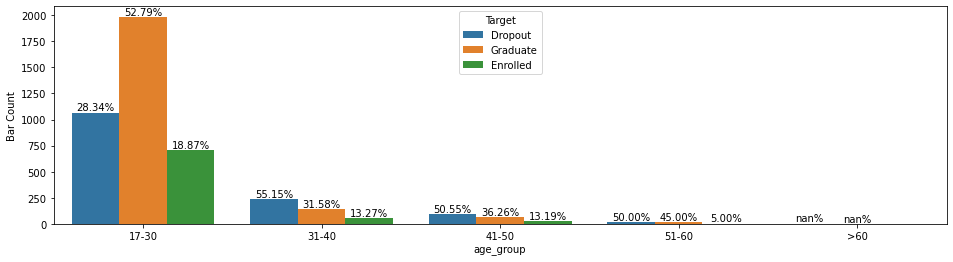

In [43]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f"{bar.get_height()/total:.2%}",
                    ha="center",va="bottom")

def hist_cat_response_relation(df,variable):
    total = float(len(df))
    #total= df[variable].value_counts()
    plt.figure(figsize=(16, 4))
    ax = sns.countplot(x=variable, hue="Target", data=df)
    ax.set(ylabel='Bar Count')
    #plt.xlabel(variable)
    barPerc(df, variable, ax)
plt.show()

s= [hist_cat_response_relation(df,i) for i in cat_vars]

In [44]:
cat_vars

['age_group']

In [45]:
df[target].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [46]:
# save data for building models
df.to_csv('clean_data_reassesment.csv')